In [1]:
import model, BeamFeatures
import torch
import matplotlib.pyplot as plt, numpy as np
m = model.GNNModel(outdim=4, edge_input=8, node_input=4)
checkpoint = torch.load('test2.cpt')
m.load_state_dict(checkpoint['model_state_dict'])
bf = BeamFeatures.BeamFeatures('/home/jake/GNN_work/data/1_9_23_pdgs/merged_val.h5', style='pdgs', ave_charge=True)

In [2]:
from torch_geometric.loader import DataLoader
loader = DataLoader(bf,
                    shuffle     = True,
                    num_workers = 0,
                    batch_size  = 64
                    )

In [3]:
# data = next(iter(loader))


In [4]:
import numpy as np

In [5]:
from train import get_confusion

In [6]:
get_confusion?

In [17]:
conf = np.zeros((4,4))

In [18]:
for data in loader:
    x = m(data, data.batch)
    conf += get_confusion(data, x)

In [19]:
new_conf2 = conf / np.sum(conf, axis=0)

In [28]:
new_conf = conf

In [32]:
for i in range(len(new_conf)):
    print(np.sum(new_conf[i,:]))
    new_conf[i,:] /= np.sum(new_conf[i,:])

1971.0
825.0
949.0
392.0


array([[9.73110096e-01, 2.33384069e-02, 3.04414003e-03, 5.07356672e-04],
       [1.21212121e-01, 8.23030303e-01, 2.78787879e-02, 2.78787879e-02],
       [7.16543730e-02, 9.90516333e-02, 8.27186512e-01, 2.10748156e-03],
       [7.39795918e-02, 4.10714286e-01, 1.27551020e-02, 5.02551020e-01]])

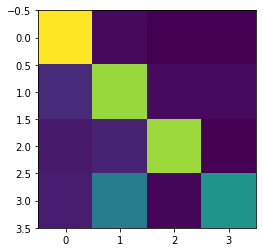

In [33]:
plt.imshow(new_conf)
new_conf

In [34]:
np.sum(new_conf, axis=1)

array([1., 1., 1., 1.])

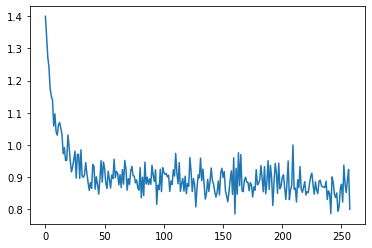

In [36]:
import h5py as h5
f = h5.File('try4_pdgs.h5', 'r')
plt.plot(f['losses'][:])


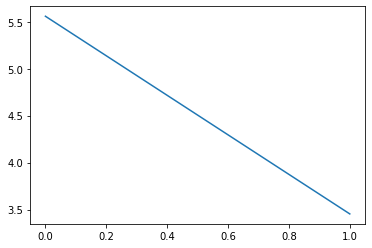

In [39]:
plt.plot(f['test_ave_losses'][:])

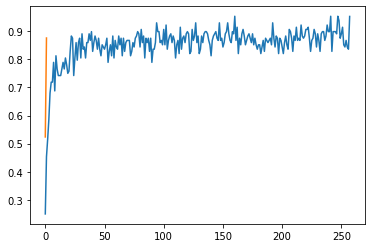

In [14]:
plt.plot(f['accuracies'][:])
plt.plot(f['test_accuracies'][:])

In [35]:
f

<Closed HDF5 file>

In [15]:
f.close()